In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [27]:
iso2_to_country = {
    "BE":"Belgium",
    "BG":"Bulgaria",
    "CZ":"Czechia",
    "DK":"Denmark",
    "DE":"Germany",
    "EE":"Estonia",
    "IE":"Ireland",
    "EL":"Greece",
    "ES":"Spain",
    "FR":"France",
    "HR":"Croatia",
    "IT":"Italy",
    "CY":"Cyprus",
    "LV":"Latvia",
    "LT":"Lithuania",
    "LU":"Luxembourg",
    "HU":"Hungary",
    "MT":"Malta",
    "NL":"Netherlands",
    "AT":"Austria",
    "PL":"Poland",
    "PT":"Portugal",
    "RO":"Romania",
    "SI":"Slovenia",
    "SK":"Slovakia",
    "FI":"Finland",
    "SE":"Sweden"
}
iso2 = list(iso2_to_country.keys())

In [28]:
# clean and write data to csv
sj = pd.read_csv('sport_jobs_raw.csv')
sj.drop(["DATAFLOW","LAST UPDATE","freq","sex","unit","OBS_FLAG"], inplace=True, axis=1)
sj = sj[sj["geo"].isin(iso2)]
sj["geo"] = sj["geo"].apply(lambda x: iso2_to_country[x])
sj.rename(columns={'geo':"country", 'TIME_PERIOD':"year", "OBS_VALUE":"employed"}, inplace=True)
sj["employed"] = sj["employed"].apply(lambda x: int(x*10000))
sj.reset_index()
sj.head()

,country,year,employed
0,Austria,2011,251000
1,Austria,2012,240000
2,Austria,2013,258000
3,Austria,2014,278000
4,Austria,2015,359000


In [29]:
sj.to_csv("sports_jobs.csv", index=False)

,country,year,employed,neutral,home_win,away_win,games_played,goal_diff,win_rate
0,Austria,2011,251000,0,1,0,6,-8,0.166667
1,Austria,2012,240000,0,1,0,3,1,0.333333
2,Austria,2013,258000,0,1,0,4,-5,0.250000
3,Austria,2014,278000,0,0,0,1,0,0.000000
4,Austria,2015,359000,0,0,1,1,3,1.000000


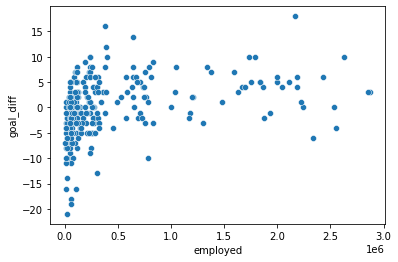

In [33]:
fb = pd.read_csv('../results_year.csv')
sj_fb = pd.merge(sj, fb, on=["country", "year"])
sns.scatterplot(data=sj_fb, x="employed", y="goal_diff")
sj_fb.head()